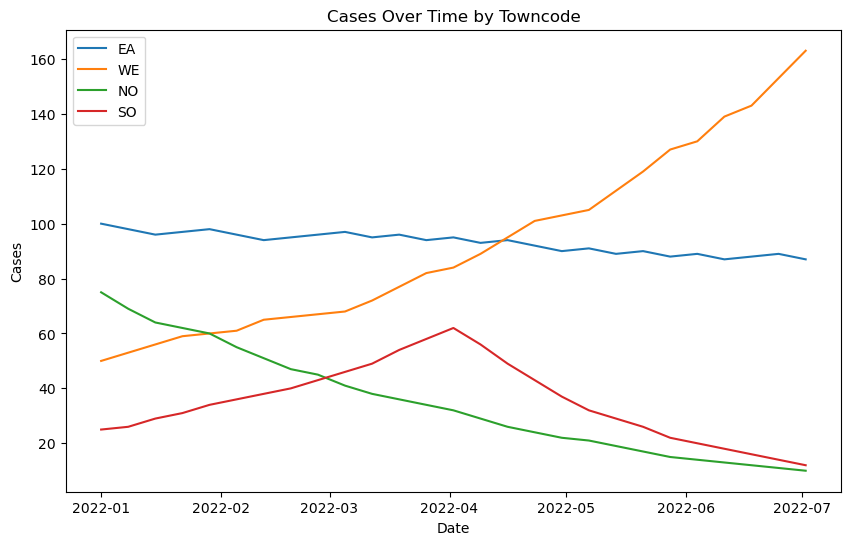

C:\Users\kanis\AppData\Local\Temp\ipykernel_17072\1011628212.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Towncode_data['infection_percentage'] = (Towncode_data['Cases'] / Towncode_data['Population']) * 100
C:\Users\kanis\AppData\Local\Temp\ipykernel_17072\1011628212.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Towncode_data['infection_percentage'] = (Towncode_data['Cases'] / Towncode_data['Population']) * 100
C:\Users\kanis\AppData\Local\Temp\ipykernel_17072\1011628212.py:30: SettingWithCop

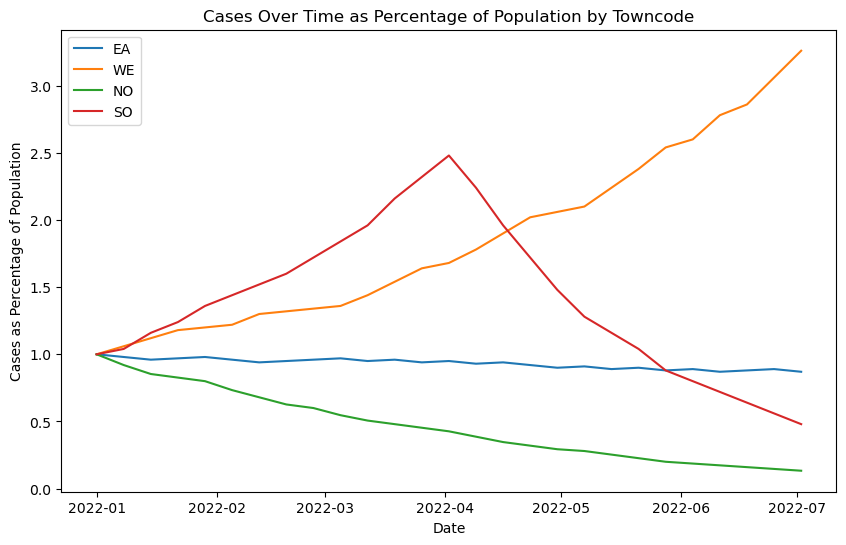

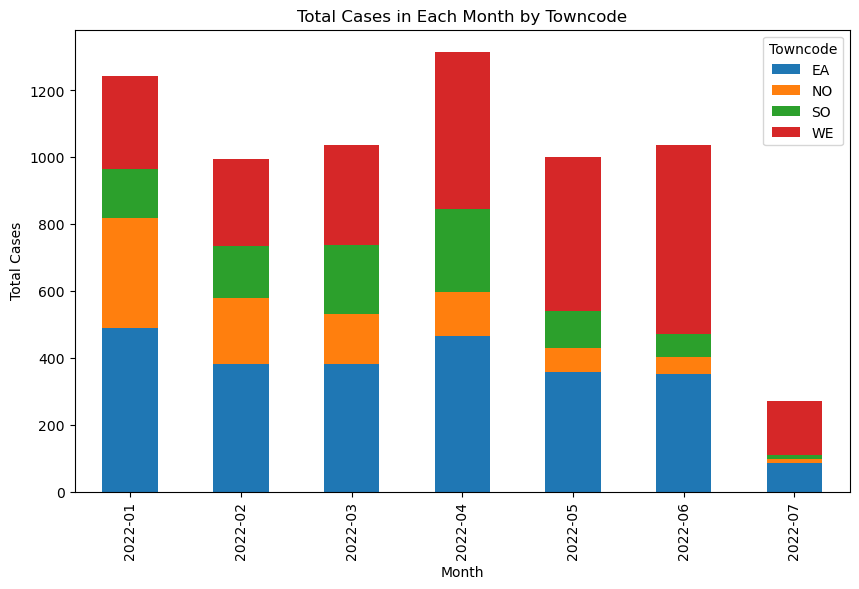

In [25]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the data
health_data = pd.read_csv('countyhealth.csv')
pop_data = pd.read_csv('countypop.csv')

# Merge the data on Towncode
data = pd.merge(health_data, pop_data, on='Towncode')

# Convert Date to Datetime
data['Date'] = pd.to_datetime(data['Date'])

# 1. Line chart showing Cases over time for all Towncodes
plt.figure(figsize=(10, 6))
for Towncode in data['Towncode'].unique():
    Towncode_data = data[data['Towncode'] == Towncode]
    plt.plot(Towncode_data['Date'], Towncode_data['Cases'], label=Towncode)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Cases Over Time by Towncode')
plt.legend()
plt.show()

# 2. Line chart showing each Towncode's Cases over time as a percentage of the Towncode's Population
plt.figure(figsize=(10, 6))
for Towncode in data['Towncode'].unique():
    Towncode_data = data[data['Towncode'] == Towncode]
    Towncode_data['infection_percentage'] = (Towncode_data['Cases'] / Towncode_data['Population']) * 100
    plt.plot(Towncode_data['Date'], Towncode_data['infection_percentage'], label=Towncode)
plt.xlabel('Date')
plt.ylabel('Cases as Percentage of Population')
plt.title('Cases Over Time as Percentage of Population by Towncode')
plt.legend()
plt.show()

# 3. Stacked bar chart showing the total number of Cases in each month
data['month'] = data['Date'].dt.to_period('M')
monthly_data = data.groupby(['month', 'Towncode'])['Cases'].sum().unstack().fillna(0)
monthly_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Total Cases in Each Month by Towncode')
plt.legend(title='Towncode')
plt.show()
